---

### Bias Variance Trade-Off
###### 偏差-方差 Bias注重对整体模型均值的把控，Variance注重个体差异的把控。

---

# EDA

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv(filepath_or_buffer="titanic_train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


###### df.isnull() == df.isna()

<AxesSubplot:>

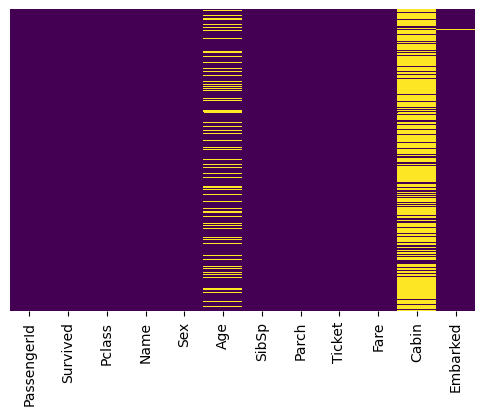

In [4]:
ax, fig = plt.subplots(dpi=100)
sns.heatmap(data=train.isnull(), yticklabels=False, cbar=False, cmap="viridis")
# yticklabels
# cbar

<AxesSubplot:xlabel='Survived', ylabel='count'>

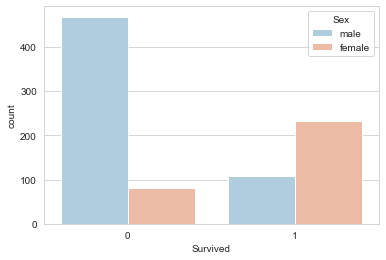

In [5]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Sex", palette="RdBu_r")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

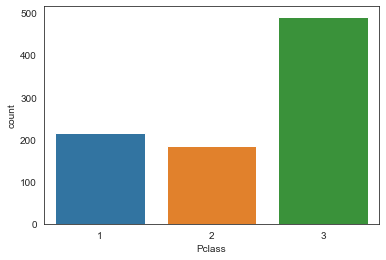

In [6]:
sns.set_style("white")
sns.countplot(data=train, x="Pclass")

<AxesSubplot:xlabel='Survived', ylabel='count'>

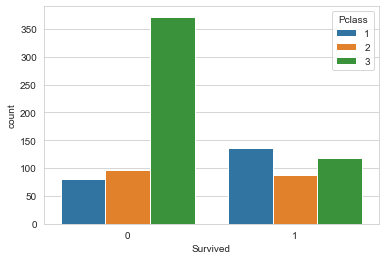

In [7]:
sns.set_style("whitegrid")
sns.countplot(x="Survived", data=train, hue="Pclass")

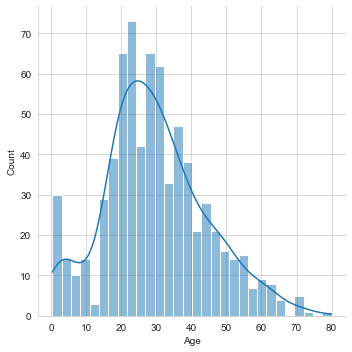

In [8]:
sns.displot(data=train["Age"].dropna(axis=0), bins=30, kde=True)
# right skewed

<AxesSubplot:xlabel='Age', ylabel='Count'>

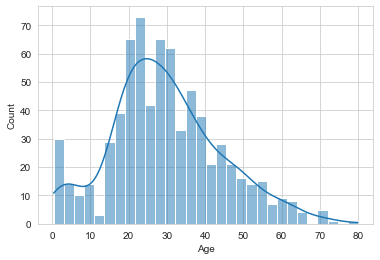

In [9]:
sns.histplot(data=train["Age"].dropna(axis=0), bins=30, kde=True)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

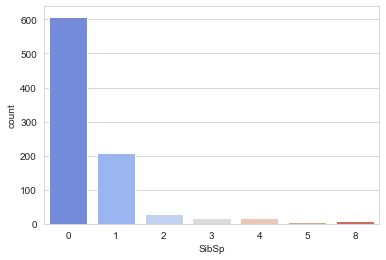

In [10]:
sns.countplot(x="SibSp", data=train, palette="coolwarm")
# SibSp: sibling and spouse

(-5.0, 500.0)

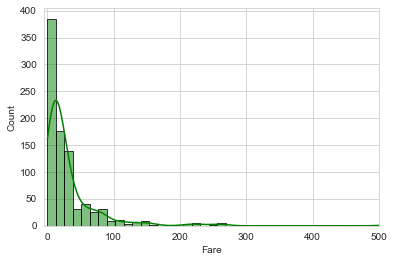

In [11]:
sns.histplot(data=train["Fare"], bins=40, kde=True, color="green", edgecolor="black")
plt.xlim(-5, 500)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

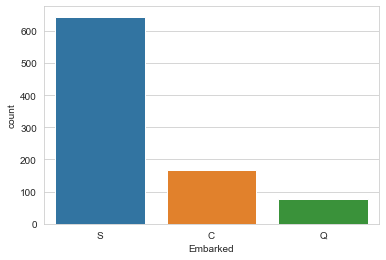

In [12]:
sns.countplot(data=train, x="Embarked")

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

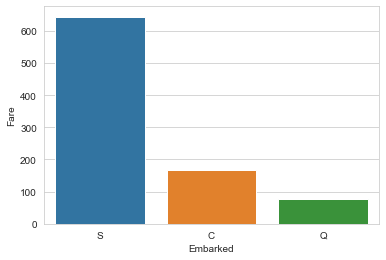

In [13]:
sns.barplot(data=train, x="Embarked", y='Fare', estimator=np.ma.count)

<AxesSubplot:xlabel='Cabin'>

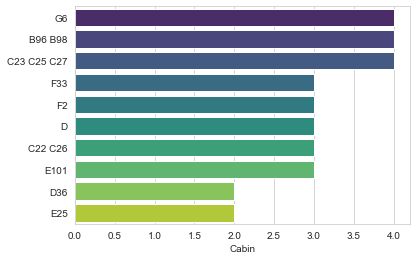

In [14]:
temp = train["Cabin"].dropna(axis=0).value_counts(ascending=False).head(10).to_frame()
sns.barplot(data=temp, y=temp.index, x="Cabin", estimator=np.sum, palette="viridis")

# Data Cleaning

###### "Age" and "Cabin" columns got a lot missing values

In [15]:
len(train) - train.count()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

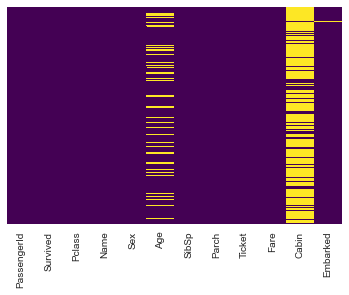

In [16]:
sns.heatmap(data=train.isnull(), cbar=False, yticklabels=False, cmap="viridis")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

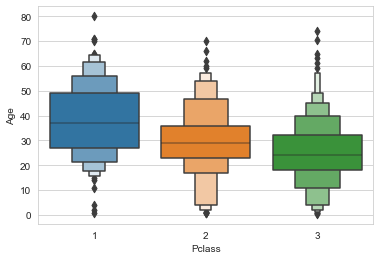

In [17]:
sns.boxenplot(x="Pclass", y="Age", data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

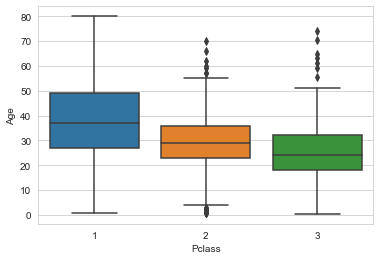

In [18]:
sns.boxplot(x="Pclass", y="Age", data=train)

###### Impute "Age" column

In [19]:
train[train["Pclass"] == 1]["Age"].mean()

38.233440860215055

In [20]:
train[train["Pclass"] == 2]["Age"].mean()

29.87763005780347

In [21]:
np.mean(train[train["Pclass"] == 3]["Age"])

25.14061971830986

In [22]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# axis = 1 in apply() !

In [24]:
train["Age"] = train[["Age", "Pclass"]].apply(func=impute_age, axis=1)

<AxesSubplot:>

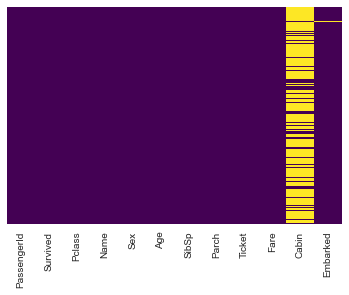

In [25]:
sns.heatmap(data=train.isnull(), cbar=False, yticklabels=False, cmap="viridis")

###### Since "Cabin" column has so many missing values, we drop it

In [26]:
train = train.drop(labels="Cabin", axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

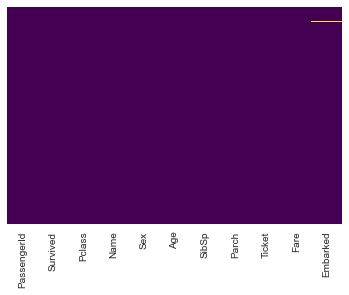

In [27]:
sns.heatmap(data=train.isnull(), cbar=False, yticklabels=False, cmap="viridis")

###### Drop "Embarked" column

In [28]:
train[train["Embarked"].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [29]:
train["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [30]:
train = train.dropna(axis=0, how="any")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

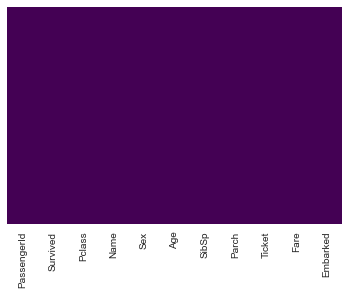

In [31]:
sns.heatmap(data=train.isnull(), cbar=False, yticklabels=False, cmap="viridis")

###### Dummy for "Sex" Column

In [32]:
pd.get_dummies(data=train["Sex"])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [33]:
sex = pd.get_dummies(data=train["Sex"], drop_first=True)

In [34]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [35]:
embark = pd.get_dummies(data=train["Embarked"], drop_first=True)

In [36]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [37]:
train = pd.concat(objs=[train, sex, embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [38]:
train = train.drop(labels=["Name", "Sex", "Ticket", "Embarked"], axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [39]:
train["Pclass"]

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 889, dtype: int64

In [40]:
train["Pclass"].unique()

array([3, 1, 2], dtype=int64)

# Logistic Regression

In [41]:
X = train.drop(labels="Survived", axis=1)
y = train["Survived"]

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [45]:
lr = LogisticRegression()

In [46]:
lr.fit(X=X_train, y=y_train)

C:\Users\Perry\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
predictions = lr.predict(X=X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_true=y_test,y_pred=predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [50]:
from sklearn.metrics import confusion_matrix

In [51]:
confusion_matrix(y_true=y_test,y_pred=predictions)

array([[148,  15],
       [ 39,  65]], dtype=int64)

# TP FP
# FN TN

# Type I Error -> FP
# Type II Error -> FN

<img src="CM.png">

---